# PETCA - Projeto de Análise de Contas de Energia com Aprendizado de Máquina e Redes Neurais

## Índice
- [Modelos Utilizados](#modelos-utilizados)
- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando os Datasets](#importando-os-datasets)
- [Análise Inicial dos Datasets](#análise-inicial-dos-datasets)
- [Análise Exploratória dos Dados](#aed)
- [Criando os Modelos](#criando-os-modelos)
- [Treinando os Modelos](#treinando-os-modelos)
- [Resultados os Modelos](#resultados-dos-modelos)
    - [Realização dos Testes](#testes)
    - [Qualidade dos Modelos](#qualidade-dos-testes-e-resultados)
- [Discussão](#discussão)

## Modelos Utilizados
- Árvore de Decisão (Decision Tree)
- Ensemble
- Floresta Randômica (Random Forest)
- Redes Neurais Convolucionais
- Regressão Linear
- Regressão Polinomial
- Support Vector Machine (SVM)

## Importando os pacotes e bibliotecas

In [1]:
# biblioteca para realizar o corte teste | treino
from sklearn.model_selection import train_test_split

# bibliotecas de classificacao
## Floresta Randomica;
## Arvore de Decisao; e
## Support Vector Machine (SVM).
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# biblioteca de modelos polinomiais
from sklearn.preprocessing import PolynomialFeatures

# biblioteca de modelos lineares
## Regressao Linear; e
## Support Vector Machine (SVM).
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# bibliotecas de suporte -----
## Impressao de Graficos
from matplotlib import pyplot as plt
import seaborn as sns

## Bibliotecas Base
import pandas as pd
import numpy as np
# ----------------------------

# bibliotecas e pacotes do TensorFlow
## Redes Neurais Convolucionais
import tensorflow as tf
from keras import layers, models

2024-08-05 19:27:16.406668: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-05 19:27:16.487898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 19:27:16.487949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 19:27:16.491233: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 19:27:16.504222: I tensorflow/core/platform/cpu_feature_gua

## Importando os datasets

In [2]:
df_residencial_raw = pd.read_csv("./databases/raw/CONSUMO MENSAL DE ENERGIA ELÉTRICA POR CLASSE - CONSUMO COMERCIAL POR UF.csv", sep = ",", index_col = 0)

## Análise Inicial dos Datasets

### Consumo Residencial por UF

In [3]:
df_residencial_raw.sample(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252
Empresa de Pesquisa Energética - EPE,,,,,,,,,,,,,,,,,,,,,
Pará,78.075,72.467,75.857,78.779,79.714,82.470,79.919,83.589,83.100,82.032,...,195.932,196.144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amapá,12.164,3.894,8.639,8.461,7.704,8.309,8.733,7.858,8.850,9.621,...,25.339,26.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roraima,6.141,5.822,5.494,6.035,5.548,5.472,5.876,5.820,5.652,5.980,...,26.157,26.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rondônia,25.870,23.367,24.153,24.113,25.789,24.112,24.312,25.604,25.980,27.250,...,64.375,67.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,...,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
NaN,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paraíba,35.917,32.453,34.378,35.924,33.864,33.950,32.155,31.641,35.194,34.712,...,94.813,96.817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rio Grande do Norte,41.973,37.909,41.133,43.495,41.067,41.715,39.380,40.479,41.184,42.784,...,95.051,95.542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acre,7.895,7.329,7.420,7.345,7.142,6.955,7.205,7.580,8.309,7.910,...,23.381,24.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quantidade de valores nulos

In [4]:
df_residencial_transposto = df_residencial_raw.transpose()
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,Consumo de energia elétrica na rede (MWh),Sistema SIMPLES,NaN,NaN,NaN,TOTAL POR UF,Rondônia,Acre,Amazonas,Roraima,...,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal,Nota: atualização defasada para não antecipar informações de distribuidoras que devem obedecer às intruções da CVM sobre publicação de resultados.
Unnamed: 56,NaN,NaN,NaN,NaN,AGO,4.984.063,34.261,11.082,70.556,7.659,...,628.142,1.681.832,329.142,204.351,306.255,56.912,87.984,139.941,108.808,NaN
Unnamed: 60,NaN,NaN,NaN,NaN,DEZ,5.386.038,34.887,11.058,68.479,9.127,...,665.385,1.808.926,357.688,211.490,347.986,64.963,89.730,143.559,119.612,NaN
Unnamed: 213,NaN,NaN,NaN,NaN,SET,7.274.689,61.224,23.707,125.349,21.839,...,725.812,2.255.854,513.504,351.131,341.161,107.484,153.480,224.473,175.270,NaN
Unnamed: 146,NaN,NaN,NaN,NaN,FEV,7.714.336,52.199,19.568,106.846,16.653,...,934.857,2.493.505,531.939,381.380,481.190,107.263,141.607,189.318,166.111,NaN
Unnamed: 185,NaN,NaN,NaN,NaN,MAI,7.767.779,58.945,21.979,112.602,17.483,...,897.422,2.519.082,504.752,357.955,413.988,102.598,152.355,210.947,172.317,NaN
Unnamed: 251,NaN,NaN,NaN,NaN,NOV,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 138,NaN,NaN,NaN,NaN,JUN,7.072.660,54.095,19.190,107.651,15.320,...,856.180,2.283.526,466.854,308.299,399.202,85.974,135.348,181.309,168.543,NaN
Unnamed: 215,NaN,NaN,NaN,NaN,NOV,7.484.640,57.849,22.217,122.169,22.387,...,729.056,2.302.508,526.400,377.423,405.771,98.660,145.903,215.856,173.966,NaN
Unnamed: 99,NaN,NaN,NaN,NaN,MAR,7.036.828,53.988,14.916,99.293,12.012,...,869.194,2.302.532,474.064,350.413,483.056,89.904,118.815,173.508,155.808,NaN
Unnamed: 117,NaN,NaN,NaN,NaN,SET,6.760.321,50.644,15.868,110.244,12.860,...,796.809,2.231.529,450.751,267.739,389.553,85.422,116.485,182.137,167.663,NaN


In [5]:
columns_to_be_droped = [
    "Consumo de energia elétrica na rede (MWh)",
    "Sistema SIMPLES",
    "Nota: atualização defasada para não antecipar informações de distribuidoras que devem obedecer às intruções da CVM sobre publicação de resultados.",
    "TOTAL POR UF"
]

In [6]:
df_residencial_transposto.drop(columns = columns_to_be_droped, inplace = True, axis = "columns")
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,NaN,NaN,NaN,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 12,NaN,NaN,DEZ,26.206,8.122,55.654,6.737,85.977,9.605,15.969,...,86.497,614.238,1.475.363,268.505,170.575,291.864,56.704,74.257,97.545,97.081
Unnamed: 64,NaN,NaN,ABR,33.062,11.136,64.486,8.381,92.633,11.357,20.675,...,112.563,717.088,1.898.231,388.285,256.591,371.758,69.142,96.529,163.399,133.741
Unnamed: 15,NaN,NaN,MAR,25.747,8.068,52.179,6.088,82.983,9.605,15.339,...,91.927,631.196,1.538.797,289.467,192.643,311.501,58.669,86.605,101.356,91.502
Unnamed: 241,NaN,2024*,JAN,63.592,23.626,134.212,25.915,194.406,25.635,37.668,...,185.656,880.624,2.862.907,668.179,522.126,506.132,102.951,151.083,243.901,176.447
Unnamed: 119,NaN,NaN,NOV,53.027,16.984,109.600,13.346,140.934,22.967,37.620,...,147.252,860.899,2.462.167,479.215,311.677,428.509,97.547,133.681,199.184,181.681
Unnamed: 147,NaN,NaN,MAR,55.293,21.012,113.510,18.492,137.816,20.924,38.852,...,173.810,965.898,2.452.440,514.992,367.902,474.929,111.731,147.650,195.983,174.162
Unnamed: 230,NaN,NaN,FEV,54.871,20.649,110.512,21.194,168.418,18.451,35.098,...,174.009,836.768,2.557.049,592.226,514.240,517.115,106.670,145.345,209.090,165.747
Unnamed: 146,NaN,NaN,FEV,52.199,19.568,106.846,16.653,139.937,21.378,33.195,...,169.677,934.857,2.493.505,531.939,381.380,481.190,107.263,141.607,189.318,166.111
Unnamed: 27,NaN,NaN,MAR,27.565,8.610,52.198,6.592,84.087,8.771,15.933,...,103.277,680.072,1.671.868,302.344,215.457,314.610,56.719,85.150,105.901,100.264
Unnamed: 250,NaN,NaN,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Renomeando colunas que não possuiam nomes

In [7]:
columns_to_rename = pd.Series(df_residencial_transposto.columns)
columns_to_rename = columns_to_rename.fillna("new_name" + (columns_to_rename.groupby(columns_to_rename.isnull()).cumcount() + 1).astype(str))
df_residencial_transposto.columns = columns_to_rename
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,new_name1,new_name2,new_name3,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 229,NaN,2023,JAN,57.347,21.636,119.195,22.579,176.755,21.309,34.738,...,164.737,792.826,2.548.374,577.695,463.513,486.490,101.008,136.436,208.186,163.882
Unnamed: 31,NaN,NaN,JUL,30.472,9.341,59.619,6.062,86.599,9.671,16.431,...,82.697,552.084,1.443.154,264.781,168.342,264.047,48.172,71.540,96.527,93.021
Unnamed: 131,NaN,NaN,NOV,55.853,18.698,112.154,15.194,150.865,23.935,35.919,...,156.474,931.614,2.620.545,542.942,351.456,468.809,112.302,147.862,210.435,192.689
Unnamed: 41,NaN,NaN,MAI,31.634,9.383,58.987,7.474,90.581,10.261,18.711,...,103.734,639.737,1.647.064,305.189,210.050,307.129,55.325,81.606,111.499,107.085
Unnamed: 138,NaN,NaN,JUN,54.095,19.190,107.651,15.320,136.803,20.863,35.724,...,143.683,856.180,2.283.526,466.854,308.299,399.202,85.974,135.348,181.309,168.543
Unnamed: 219,NaN,NaN,MAR,57.027,21.459,116.136,21.776,174.725,21.185,37.432,...,186.197,885.251,2.596.482,620.818,490.652,484.736,122.059,165.366,220.280,169.714
Unnamed: 114,NaN,NaN,JUN,49.930,16.424,102.982,12.465,136.934,20.240,30.899,...,134.065,815.069,2.122.055,427.223,281.704,379.382,80.790,123.678,176.925,166.606
Unnamed: 90,NaN,NaN,JUN,44.253,12.178,84.401,10.164,123.278,16.275,26.656,...,113.174,666.181,1.881.431,382.889,244.197,348.720,65.347,98.788,151.096,143.378
Unnamed: 154,NaN,NaN,OUT,55.628,21.408,108.642,17.872,161.510,22.753,37.471,...,137.997,822.764,2.184.559,445.565,293.822,360.479,96.901,137.352,198.301,172.854
Unnamed: 145,NaN,2016,JAN,51.980,19.358,114.442,15.632,138.997,21.231,31.018,...,154.438,974.534,2.513.727,494.909,368.840,488.904,102.923,129.246,189.382,174.267


### Excluindo coluna insignificante

In [8]:
df_residencial_transposto.drop(columns = ["new_name1"], inplace = True, axis = "columns")
df_residencial_transposto.sample(10)

Empresa de Pesquisa Energética - EPE,new_name2,new_name3,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 237,NaN,SET,68.834,25.331,147.337,26.748,207.992,25.102,43.376,108.778,...,159.963,763.389,2.522.288,584.130,392.075,394.200,102.546,157.817,236.581,176.912
Unnamed: 100,NaN,ABR,47.703,16.069,89.306,14.163,116.170,16.857,27.261,76.230,...,141.921,822.943,2.306.903,454.559,309.055,430.428,87.422,113.764,184.569,165.221
Unnamed: 45,NaN,SET,33.884,9.846,65.619,7.467,98.375,12.092,19.855,51.825,...,95.250,621.840,1.665.504,315.130,188.014,284.909,55.571,79.517,115.259,107.222
Unnamed: 9,NaN,SET,25.980,8.309,55.148,5.652,83.100,8.850,17.041,44.972,...,78.583,537.621,1.430.716,264.561,148.465,251.759,51.954,69.190,97.105,98.068
Unnamed: 143,NaN,NOV,57.024,21.669,118.359,17.790,167.489,28.739,36.251,108.915,...,153.347,951.513,2.532.951,498.190,309.781,403.872,106.432,145.511,216.266,190.160
Unnamed: 132,NaN,DEZ,56.945,20.055,117.889,17.035,161.055,22.892,35.669,102.036,...,162.178,933.758,2.547.228,530.375,361.016,500.347,107.306,136.108,188.013,176.868
Unnamed: 201,NaN,SET,62.425,22.765,117.264,19.102,171.851,18.308,36.020,105.457,...,128.308,732.130,2.098.762,475.706,314.624,319.322,118.122,139.239,194.395,147.278
Unnamed: 103,NaN,JUL,46.728,15.582,97.478,11.424,119.388,18.103,28.581,76.663,...,124.731,741.606,1.921.554,393.085,255.819,373.098,69.974,113.124,166.904,150.683
Unnamed: 197,NaN,MAI,50.229,16.436,84.384,14.570,126.892,18.051,31.547,79.034,...,109.376,593.771,1.855.630,407.228,296.154,313.339,83.259,127.306,155.934,131.602
Unnamed: 203,NaN,NOV,63.095,23.789,111.261,19.347,169.584,17.820,35.384,107.971,...,137.280,764.335,2.279.423,516.248,358.110,343.443,99.770,156.824,205.602,164.460


### Renomeando colunas "ano" e "mês"

In [9]:
columns_to_rename = {
    "new_name2" : "ano",
    "new_name3" : "mes"
}

df_residencial_transposto.rename(mapper = columns_to_rename, axis = "columns", inplace = True)
df_residencial_transposto.head(5)

Empresa de Pesquisa Energética - EPE,ano,mes,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Unnamed: 1,2004,JAN,25.870,7.895,49.832,6.141,78.075,12.164,13.832,40.478,...,84.820,567.235,1.464.892,257.033,170.067,276.902,51.890,64.699,97.266,93.427
Unnamed: 2,NaN,FEV,23.367,7.329,50.457,5.822,72.467,3.894,12.160,37.893,...,83.917,594.478,1.421.228,269.481,178.963,285.451,52.518,65.905,90.106,81.618
Unnamed: 3,NaN,MAR,24.153,7.420,47.374,5.494,75.857,8.639,13.819,40.878,...,86.051,585.939,1.416.476,268.151,186.488,283.818,51.766,74.538,96.474,84.322
Unnamed: 4,NaN,ABR,24.113,7.345,49.875,6.035,78.779,8.461,14.883,40.503,...,83.633,600.339,1.579.356,275.652,170.145,297.774,55.175,77.146,102.078,94.761
Unnamed: 5,NaN,MAI,25.789,7.142,50.280,5.548,79.714,7.704,15.465,42.202,...,82.244,564.569,1.386.690,267.628,161.961,266.991,49.652,68.100,95.321,90.165


### Preenchendo a coluna "ano" com valores corretos do ano

In [10]:
df_residencial_transposto["ano"] = df_residencial_transposto["ano"].ffill()

## Transformando colunas importantes em Índice

In [11]:
df_residencial_transposto["ano"].unique()

array(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024*'], dtype=object)

In [12]:
df_residencial_transposto["mes"].unique()

array(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET',
       'OUT', 'NOV', 'DEZ'], dtype=object)

In [13]:
df_residencial_transposto.columns

Index(['ano', 'mes', 'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará',
       'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará',
       'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe',
       'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro',
       'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='Empresa de Pesquisa Energética - EPE')

In [14]:
df_residencial_transposto.reset_index(inplace = True)
df_residencial_transposto["ano"] = df_residencial_transposto["ano"].astype("str")
df_residencial_transposto["mes"] = df_residencial_transposto["mes"].astype("str")
df_residencial_transposto.set_index(["ano", "mes"], inplace = True)
df_residencial_transposto.drop(columns = ["index"], axis = "columns", inplace = True)

In [15]:
df_residencial_transposto.sample(10)

,Empresa de Pesquisa Energética - EPE,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
ano,mes,,,,,,,,,,,,,,,,,,,,,
2010,NOV,43.555,13.135,83.926,10.980,115.182,16.322,25.072,73.529,40.999,144.785,...,114.477,698.014,1.916.409,381.466,239.494,339.736,68.669,97.333,162.994,145.651
2018,SET,55.864,19.219,107.012,17.759,162.712,22.630,37.406,107.188,71.905,161.877,...,124.329,763.390,2.279.357,466.343,307.185,372.050,89.935,142.041,208.359,168.986
2022,MAI,60.023,22.062,93.340,20.905,179.501,21.565,39.406,95.508,70.954,184.875,...,154.090,766.995,2.399.989,507.105,388.556,383.942,92.063,152.498,234.778,161.466
2010,MAI,40.166,11.915,76.178,9.676,106.781,14.810,25.787,68.100,36.837,140.483,...,120.145,699.622,1.873.228,357.417,231.499,341.079,66.330,95.319,150.768,136.650
2004,JUL,24.312,7.205,53.678,5.876,79.919,8.733,14.775,41.961,22.937,87.315,...,75.145,524.985,1.348.602,238.401,146.430,251.824,42.928,66.190,86.788,87.198
2019,FEV,55.380,19.788,104.135,17.042,135.183,19.099,33.557,97.679,63.129,204.923,...,163.971,930.608,2.664.088,586.916,435.692,501.161,121.933,159.859,220.296,175.615
2009,NOV,39.584,12.149,80.592,9.962,108.755,15.056,22.334,64.011,37.338,135.018,...,113.285,739.456,1.918.770,377.901,239.817,342.083,68.685,90.008,161.169,133.041
2006,JUN,28.019,8.454,58.056,6.603,87.535,9.912,16.908,49.012,26.331,103.436,...,86.109,564.018,1.474.424,266.449,172.292,270.414,45.106,72.687,99.028,97.582
2024*,NOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Deletando a linha NaN do índice

In [16]:
df_residencial_processed = df_residencial_transposto.iloc[ : df_residencial_transposto.shape[0] - 12, :]
df_residencial_processed.tail(20)

Empresa de Pesquisa Energética - EPE Rondônia    Acre Amazonas Roraima  \
ano  mes                                                                 
2022 MAI                               60.023  22.062   93.340  20.905   
     JUN                               55.906  20.726  110.633  20.277   
     JUL                               58.845  22.736  125.392  20.642   
     AGO                               62.511  22.869  135.581  23.444   
     SET                               63.313  22.775  134.471  23.988   
     OUT                               63.402  23.731  132.866  24.426   
     NOV                               60.625  22.916  130.245  22.875   
     DEZ                               63.862  22.562  125.544  22.698   
2023 JAN                               57.347  21.636  119.195  22.579   
     FEV                               54.871  20.649  110.512  21.194   
     MAR                               61.713  22.479  125.556  24.873   
     ABR                               59.678  21.441  123.118  23.108   
     MAI                               63.534  22.452  133.650  23.453   
     JUN                               63.088  21.567  132.674  22.501   
     JUL                               60.077  22.285  138.483  22.241   
     AGO                               65.204  24.295  148.584  26.455   
     SET                               68.834  25.331  147.337  26.748   
     OUT                               67.340  25.390  146.305  26.993   
     NOV                               69.317  25.277  140.994  26.314   
     DEZ                               68.373  24.610  133.602  24.974   

Empresa de Pesquisa Energética - EPE     Pará   Amapá Tocantins Maranhão  \
ano  mes                                                                   
2022 MAI                              179.501  21.565    39.406   95.508   
     JUN                              182.373  22.355    39.379   93.184   
     JUL                              184.979  22.587    39.051   93.368   
     AGO                              193.527  23.411    40.429  100.982   
     SET                              196.497  25.103    42.666  100.815   
     OUT                              196.761  26.246    43.725  101.912   
     NOV                              187.033  23.196    39.280   99.693   
     DEZ                              186.473  23.793    37.600  100.793   
2023 JAN                              176.755  21.309    34.738   93.891   
     FEV                              168.418  18.451    35.098   89.814   
     MAR                              194.433  22.387    39.935   97.012   
     ABR                              184.017  22.833    37.873   93.987   
     MAI                              189.880  23.913    40.181  104.726   
     JUN                              197.274  25.023    41.039  103.675   
     JUL                              198.387  25.092    40.260  105.214   
     AGO                              206.946  30.217    41.552  109.107   
     SET                              207.992  25.102    43.376  108.778   
     OUT                              213.696  27.594    44.697  113.651   
     NOV                              218.560  27.976    43.095  111.837   
     DEZ                              206.848  27.175    43.730  111.114   

Empresa de Pesquisa Energética - EPE   Piauí    Ceará  ... Espírito Santo  \
ano  mes                                               ...                  
2022 MAI                              70.954  184.875  ...        154.090   
     JUN                              69.828  191.863  ...        137.109   
     JUL                              70.545  181.182  ...        131.802   
     AGO                              71.933  185.456  ...        141.382   
     SET                              77.695  190.513  ...        136.535   
     OUT                              78.215  189.588  ...        150.188   
     NOV                              73.635  195.777  ...        152.476   
     

### Verificandos os tipos das colunas do dataset

In [17]:
df_residencial_processed.dtypes

Empresa de Pesquisa Energética - EPE
Rondônia               object
Acre                   object
Amazonas               object
Roraima                object
Pará                   object
Amapá                  object
Tocantins              object
Maranhão               object
Piauí                  object
Ceará                  object
Rio Grande do Norte    object
Paraíba                object
Pernambuco             object
Alagoas                object
Sergipe                object
Bahia                  object
Minas Gerais           object
Espírito Santo         object
Rio de Janeiro         object
São Paulo              object
Paraná                 object
Santa Catarina         object
Rio Grande do Sul      object
Mato Grosso do Sul     object
Mato Grosso            object
Goiás                  object
Distrito Federal       object
dtype: object

### Trocando os tipos dos dados para melhor compressão e compreensão do dataset

Os dados serão trocados para o tipo "unsigned integer" de 32 bits

In [18]:
for coluna in df_residencial_processed.columns:
    df_residencial_processed[coluna] = [valor.replace(".", "") for valor in df_residencial_processed[coluna]]

/tmp/ipykernel_38331/1611594844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residencial_processed[coluna] = [valor.replace(".", "") for valor in df_residencial_processed[coluna]]


In [19]:
df_residencial_processed["Rondônia"] = df_residencial_processed["Rondônia"].astype("uint32")
df_residencial_processed["Acre"] = df_residencial_processed["Acre"].astype("uint32")
df_residencial_processed["Amazonas"] = df_residencial_processed["Amazonas"].astype("uint32")
df_residencial_processed["Roraima"] = df_residencial_processed["Roraima"].astype("uint32")
df_residencial_processed["Pará"] = df_residencial_processed["Pará"].astype("uint32")
df_residencial_processed["Amapá"] = df_residencial_processed["Amapá"].astype("uint32")
df_residencial_processed["Tocantins"] = df_residencial_processed["Tocantins"].astype("uint32")
df_residencial_processed["Maranhão"] = df_residencial_processed["Maranhão"].astype("uint32")
df_residencial_processed["Piauí"] = df_residencial_processed["Piauí"].astype("uint32")
df_residencial_processed["Ceará"] = df_residencial_processed["Ceará"].astype("uint32")
df_residencial_processed["Rio Grande do Norte"] = df_residencial_processed["Rio Grande do Norte"].astype("uint32")
df_residencial_processed["Paraíba"] = df_residencial_processed["Paraíba"].astype("uint32")
df_residencial_processed["Pernambuco"] = df_residencial_processed["Pernambuco"].astype("uint32")
df_residencial_processed["Alagoas"] = df_residencial_processed["Alagoas"].astype("uint32")
df_residencial_processed["Sergipe"] = df_residencial_processed["Sergipe"].astype("uint32")
df_residencial_processed["Bahia"] = df_residencial_processed["Bahia"].astype("uint32")
df_residencial_processed["Minas Gerais"] = df_residencial_processed["Minas Gerais"].astype("uint32")
df_residencial_processed["Espírito Santo"] = df_residencial_processed["Espírito Santo"].astype("uint32")
df_residencial_processed["Rio de Janeiro"] = df_residencial_processed["Rio de Janeiro"].astype("uint32")
df_residencial_processed["São Paulo"] = df_residencial_processed["São Paulo"].astype("uint32")
df_residencial_processed["Paraná"] = df_residencial_processed["Paraná"].astype("uint32")
df_residencial_processed["Santa Catarina"] = df_residencial_processed["Santa Catarina"].astype("uint32")
df_residencial_processed["Rio Grande do Sul"] = df_residencial_processed["Rio Grande do Sul"].astype("uint32")
df_residencial_processed["Mato Grosso do Sul"] = df_residencial_processed["Mato Grosso do Sul"].astype("uint32")
df_residencial_processed["Mato Grosso"] = df_residencial_processed["Mato Grosso"].astype("uint32")
df_residencial_processed["Goiás"] = df_residencial_processed["Goiás"].astype("uint32")
df_residencial_processed["Distrito Federal"] = df_residencial_processed["Distrito Federal"].astype("uint32")

/tmp/ipykernel_38331/3757876696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residencial_processed["Rondônia"] = df_residencial_processed["Rondônia"].astype("uint32")
/tmp/ipykernel_38331/3757876696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residencial_processed["Acre"] = df_residencial_processed["Acre"].astype("uint32")
/tmp/ipykernel_38331/3757876696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

### Conferindo a troca de tipos

In [20]:
df_residencial_processed.dtypes

Empresa de Pesquisa Energética - EPE
Rondônia               uint32
Acre                   uint32
Amazonas               uint32
Roraima                uint32
Pará                   uint32
Amapá                  uint32
Tocantins              uint32
Maranhão               uint32
Piauí                  uint32
Ceará                  uint32
Rio Grande do Norte    uint32
Paraíba                uint32
Pernambuco             uint32
Alagoas                uint32
Sergipe                uint32
Bahia                  uint32
Minas Gerais           uint32
Espírito Santo         uint32
Rio de Janeiro         uint32
São Paulo              uint32
Paraná                 uint32
Santa Catarina         uint32
Rio Grande do Sul      uint32
Mato Grosso do Sul     uint32
Mato Grosso            uint32
Goiás                  uint32
Distrito Federal       uint32
dtype: object

## Salvando os datasets tratados
### Eles serão salvos em .pkl (pickle)
Essa extensão criada pelos desenvolvedores da biblioteca pandas salva os metadados dos datasets enquanto comprime seu tamanho de arquivo

In [21]:
df_residencial_processed.to_pickle(path = "./databases/processed/classes-consumoComercialPorUF.pkl")

## AED
### Análise Exploratória dos Dados

### Lendo os datasets tratados em formato pickle

In [22]:
df_residencial_processed = pd.read_pickle("./databases/processed/classes-consumoComercialPorUF.pkl")

### Consumo Residencial por UF

#### Informações básicas aglutinadas

In [23]:
df_residencial_processed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 240 entries, ('2004', 'JAN') to ('2023', 'DEZ')
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rondônia             240 non-null    uint32
 1   Acre                 240 non-null    uint32
 2   Amazonas             240 non-null    uint32
 3   Roraima              240 non-null    uint32
 4   Pará                 240 non-null    uint32
 5   Amapá                240 non-null    uint32
 6   Tocantins            240 non-null    uint32
 7   Maranhão             240 non-null    uint32
 8   Piauí                240 non-null    uint32
 9   Ceará                240 non-null    uint32
 10  Rio Grande do Norte  240 non-null    uint32
 11  Paraíba              240 non-null    uint32
 12  Pernambuco           240 non-null    uint32
 13  Alagoas              240 non-null    uint32
 14  Sergipe              240 non-null    uint32
 15  Bahia                240 non-nu

#### Valores demonstrados de forma numéricas

In [24]:
for coluna in df_residencial_processed.columns:
    print("Estado " + coluna, end = "\n")
    print(f"Valor mínimo: {df_residencial_processed[coluna].min()}", end = "\n")
    print(f"Valor máximo: {df_residencial_processed[coluna].mean()}", end = "\n")
    print(f"Média: {df_residencial_processed[coluna].mean()}", end = "\n")
    print(f"Mediana: {df_residencial_processed[coluna].median()}", end = "\n")
    print(f"Desvio padrão: {df_residencial_processed[coluna].std()}", end = "\n\n")
    print(f"Moda: {df_residencial_processed[coluna].mode()}", end = "\n")

Estado Rondônia
Valor mínimo: 23367
Valor máximo: 46660.504166666666
Média: 46660.504166666666
Mediana: 50436.5
Desvio padrão: 12469.559187330657

Moda: 0    55040
Name: Rondônia, dtype: uint32
Estado Acre
Valor mínimo: 6955
Valor máximo: 16112.7
Média: 16112.7
Mediana: 17124.0
Desvio padrão: 5458.674346096898

Moda: 0     8024
1    22999
Name: Acre, dtype: uint32
Estado Amazonas
Valor mínimo: 47374
Valor máximo: 92625.24166666667
Média: 92625.24166666667
Mediana: 98386.0
Desvio padrão: 25284.766501378235

Moda: 0       47374
1       49832
2       49875
3       50280
4       50457
        ...  
235    140994
236    146305
237    147337
238    148584
239    155641
Name: Amazonas, Length: 240, dtype: uint32
Estado Roraima
Valor mínimo: 5472
Valor máximo: 13729.908333333333
Média: 13729.908333333333
Mediana: 13756.0
Desvio padrão: 5498.873356643057

Moda: 0     6035
1    17851
Name: Roraima, dtype: uint32
Estado Pará
Valor mínimo: 72467
Valor máximo: 132227.97916666666
Média: 132227.97916

#### Valores demonstrados de forma gráfica

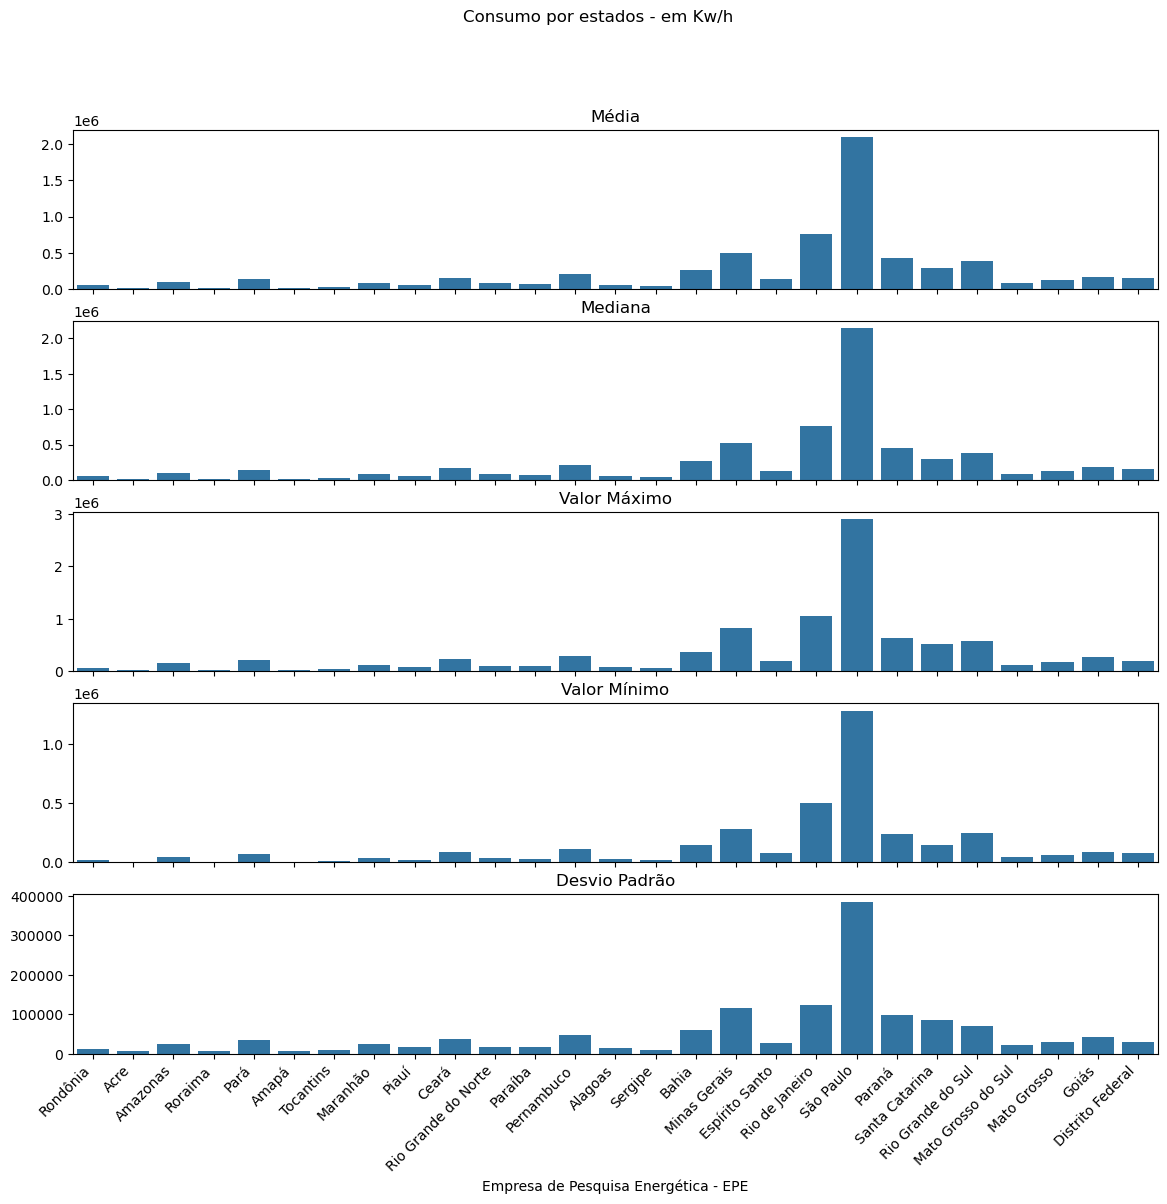

In [25]:
figura, eixos = plt.subplots(nrows = 5, ncols = 1, sharex = True, figsize = (14, 12))
plt.suptitle("Consumo por estados - em Kw/h")

sns.barplot(df_residencial_processed.mean(), ax = eixos[0])
eixos[0].set_title("Média")

sns.barplot(df_residencial_processed.median(), ax = eixos[1])
eixos[1].set_title("Mediana")

sns.barplot(df_residencial_processed.max(), ax = eixos[2])
eixos[2].set_title("Valor Máximo")

sns.barplot(df_residencial_processed.min(), ax = eixos[3])
eixos[3].set_title("Valor Mínimo")

sns.barplot(df_residencial_processed.std(), ax = eixos[4])
eixos[4].set_title("Desvio Padrão")

plt.xticks(rotation = 45, ha = "right")
plt.show()

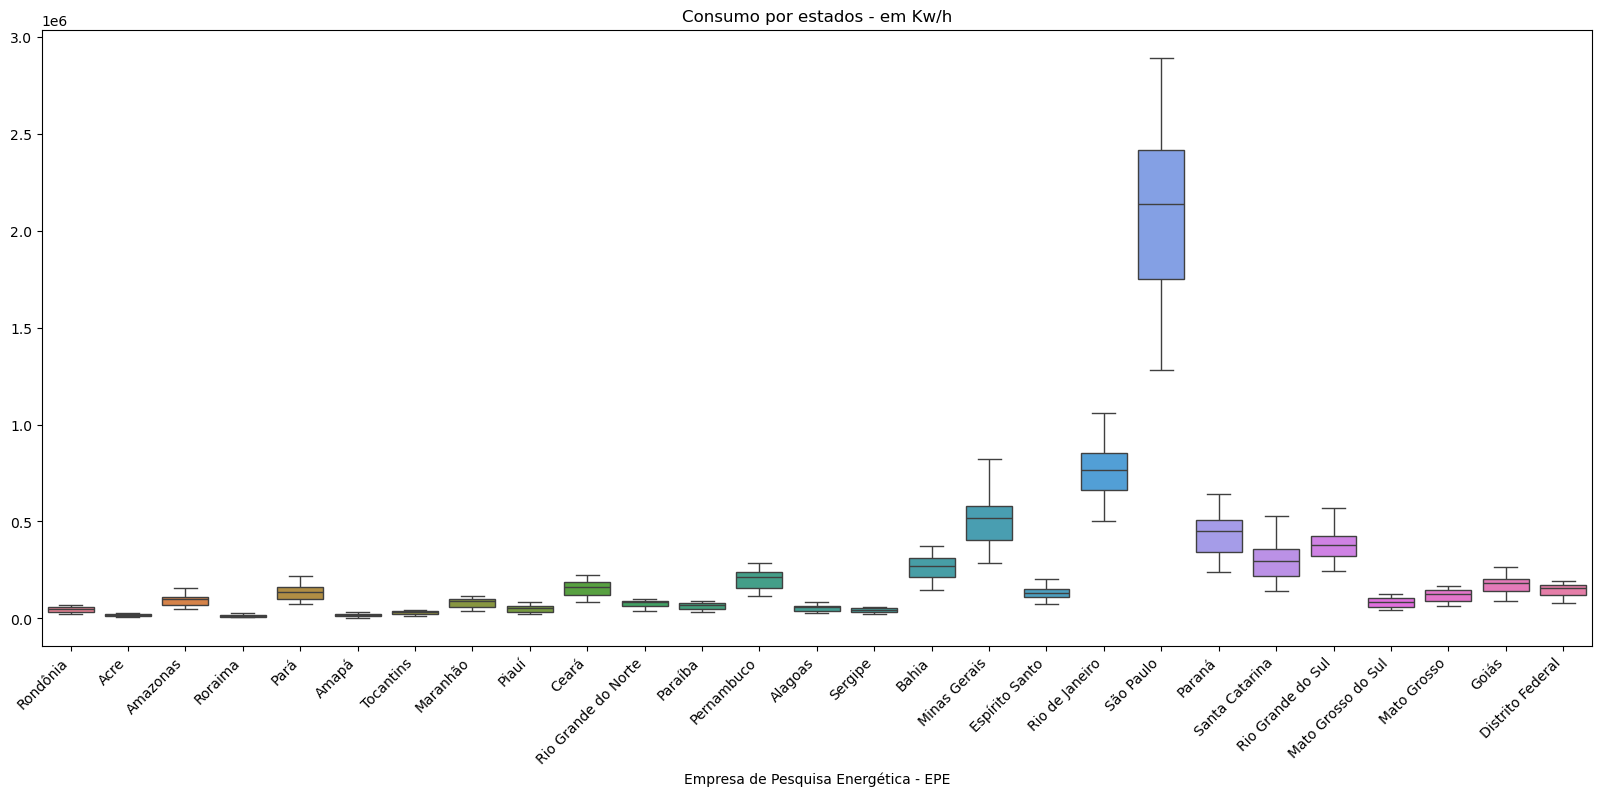

In [26]:
figura = plt.figure(figsize = (20, 8))

sns.boxplot(df_residencial_processed, orient = "v")
plt.xticks(rotation = 45, ha = "right")
plt.title("Consumo por estados - em Kw/h")

plt.show()

## Criando os Modelos

### Criando uma nova coluna com valores categóricos
- Alto
- Baixo
- Médio

Os valores servirão para a previsão do modelo de árvore de decisão

In [27]:
colunas = df_residencial_processed.columns
consumo_total = []

for coluna in colunas:
    consumo_do_estado_atual = df_residencial_processed.T.loc[coluna, :].sum()
    # print("Coluna: ", coluna, end = " ")
    # print(consumo_do_estado_atual, end = "\n\n")
    consumo_total.append(consumo_do_estado_atual)
    
print(consumo_total)

[11198521, 3867048, 22230058, 3295178, 31734715, 4228829, 6953288, 19632107, 12014133, 37555513, 18525358, 15201483, 48341496, 12953911, 10224427, 63263319, 120137041, 31203226, 182492875, 503276758, 103480995, 70349531, 90976712, 19992567, 28334063, 40930196, 35228895]


### AED - consumo total

In [28]:
primeiro_quartil = np.quantile(consumo_total, 0.25)
terceiro_quartil = np.quantile(consumo_total, 0.75)

print("Primeiro quartil: ", primeiro_quartil)
print("Terceiro quartil: ", terceiro_quartil)

Primeiro quartil:  12484022.0
Terceiro quartil:  55802407.5


### Escalando os valores para fazê-los de categóricos

In [29]:
for i in range(0, len(consumo_total)):
    if consumo_total[i] > primeiro_quartil and consumo_total[i] < terceiro_quartil:
        consumo_total[i] = 0 # NORMAL
    elif consumo_total[i] < primeiro_quartil:
        consumo_total[i] = 1 # BAIXO
    else:
        consumo_total[i] = 2 # ALTO
        
print(consumo_total)

[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0]


### Verificando mundaça

In [30]:
df_residencial_com_valor_categorico = df_residencial_processed.T
df_residencial_com_valor_categorico["consumo"] = consumo_total
df_residencial_com_valor_categorico.head(10)

ano                                    2004                              \
mes                                     JAN    FEV    MAR    ABR    MAI   
Empresa de Pesquisa Energética - EPE                                      
Rondônia                              25870  23367  24153  24113  25789   
Acre                                   7895   7329   7420   7345   7142   
Amazonas                              49832  50457  47374  49875  50280   
Roraima                                6141   5822   5494   6035   5548   
Pará                                  78075  72467  75857  78779  79714   
Amapá                                 12164   3894   8639   8461   7704   
Tocantins                             13832  12160  13819  14883  15465   
Maranhão                              40478  37893  40878  40503  42202   
Piauí                                 25398  20769  20862  24450  22877   
Ceará                                 95718  86036  90007  97130  90758   

ano                                                                      ...  \
mes                                     JUN    JUL    AGO    SET    OUT  ...   
Empresa de Pesquisa Energética - EPE                                     ...   
Rondônia                              24112  24312  25604  25980  27250  ...   
Acre                                   6955   7205   7580   8309   7910  ...   
Amazonas                              50734  53678  52589  55148  55374  ...   
Roraima                                5472   5876   5820   5652   5980  ...   
Pará                                  82470  79919  83589  83100  82032  ...   
Amapá                                  8309   8733   7858   8850   9621  ...   
Tocantins                             16111  14775  15815  17041  16450  ...   
Maranhão                              42065  41961  43550  44972  43339  ...   
Piauí                                 24519  22937  22760  25997  25217  ...   
Ceará                                 93769  87315  92398  97622  93272  ...   

ano                                     2023                                  \
mes                                      ABR     MAI     JUN     JUL     AGO   
Empresa de Pesquisa Energética - EPE                                           
Rondônia                               59678   63534   63088   60077   65204   
Acre                                   21441   22452   21567   22285   24295   
Amazonas                              123118  133650  132674  138483  148584   
Roraima                                23108   23453   22501   22241   26455   
Pará                                  184017  189880  197274  198387  206946   
Amapá                                  22833   23913   25023   25092   30217   
Tocantins                              37873   40181   41039   40260   41552   
Maranhão                               93987  104726  103675  105214  109107   
Piauí                                  69513   74618   73832   74616   79158   
Ceará                                 198290  193551  209262  187632  201380   

ano                                                                  consumo  
mes                                      SET     OUT     NOV     DEZ          
Empresa de Pesquisa Energética - EPE                                          
Rondônia                               68834   67340   69317   68373       1  
Acre                                   25331   25390   25277   24610       1  
Amazonas                              147337  146305  140994  133602       0  
Roraima                                26748   26993   26314   24974       1  
Pará                                  207992  213696  218560  206848       0  
Amapá                                  25102   27594   27976   27175       1  
Tocantins                              43376   44697   43095   43730       1  
Maranhão                              108778  113651  111837  111114       0  
Piauí                                  84283   85288   84302   81191     

### Consumo Residencial por UF

In [31]:
import models.DecisionTree
arvore_decisao = models.DecisionTree.DecisionTree()

### Divisão dos labels / dados

In [32]:
X = df_residencial_com_valor_categorico.drop(columns = ["consumo"])
y = df_residencial_com_valor_categorico["consumo"]

### Hiper parametros

In [33]:
semente_randomica = 42
divisao_treino_teste = 0.3

### Dividindo dados de treino e dados de teste

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = semente_randomica, train_size = divisao_treino_teste)

## Treinando os Modelos

## Resultados dos Modelos

### Testes

### Qualidade dos Testes e Resultados

## Discussão

A discussão vai aqui